This notebook performs exploratory data analysis and validation on three raw data files (PS2.txt, FS1.txt, profile.txt). It loads the datasets, inspects their shapes, checks for constant and duplicate rows, validates value ranges, and examines label distributions to ensure data quality before further processing.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define relative paths
base_path = "./data/raw_data/"

ps2_path = base_path + "PS2.txt"
fs1_path = base_path + "FS1.txt"
profile_path = base_path + "profile.txt"

In [13]:
# 1. Load and Inspect Shape

ps2 = pd.read_csv(ps2_path, sep="\t", header=None)
fs1 = pd.read_csv(fs1_path, sep="\t", header=None)
profile = pd.read_csv(profile_path, sep="\t", header=None)

print("PS2 shape:", ps2.shape)       # Expected: (2205, 6000)
print("FS1 shape:", fs1.shape)       # Expected: (2205, 600)
print("Profile shape:", profile.shape)  # Expected: (2205, 5)

PS2 shape: (2205, 6000)
FS1 shape: (2205, 600)
Profile shape: (2205, 5)


In [14]:
#2. Check for Constant or Duplicate Row
print("Constant PS2 rows:", (ps2.nunique(axis=1) == 1).sum())
print("Constant FS1 rows:", (fs1.nunique(axis=1) == 1).sum())

# Duplicate cycles
print("Duplicate PS2 rows:", ps2.duplicated().sum())



Constant PS2 rows: 0
Constant FS1 rows: 0
Duplicate PS2 rows: 0


In [15]:
#3. Validate Physical Ranges

print("PS2 value range:", ps2.min().min(), "to", ps2.max().max())
print("FS1 value range:", fs1.min().min(), "to", fs1.max().max())


PS2 value range: 0.0 to 167.77
FS1 value range: 0.0 to 20.479


In [ ]:
#4. Check Label Distribution in profile.txt
valve_values = profile[1].unique()
print("Valve condition values:", valve_values)
print("Value counts:\n", profile[1].value_counts())


Valve condition values: [100  73  80  90]
Value counts:
 1
100    1125
73      360
80      360
90      360
Name: count, dtype: int64


       cooler_cond   valve_cond  pump_leakage  accumulator_press  stable_flag
count  2205.000000  2205.000000   2205.000000        2205.000000  2205.000000
mean     41.240816    90.693878      0.669388         107.199546     0.342857
std      42.383143    10.681802      0.817233          16.435848     0.474772
min       3.000000    73.000000      0.000000          90.000000     0.000000
25%       3.000000    80.000000      0.000000          90.000000     0.000000
50%      20.000000   100.000000      0.000000         100.000000     0.000000
75%     100.000000   100.000000      1.000000         130.000000     1.000000
max     100.000000   100.000000      2.000000         130.000000     1.000000


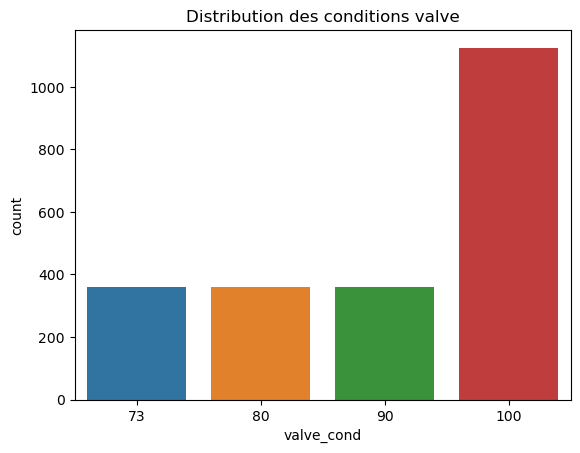

In [ ]:
#5. Visualize Data Profile

# Loading profile.txt (tab-delimited)
profile.columns = ['cooler_cond', 'valve_cond', 'pump_leakage', 'accumulator_press', 'stable_flag']

print(profile.describe())

# Valve distribution condition
sns.countplot(x='valve_cond', data=profile)
plt.title("Distribution des conditions valve")
plt.show()




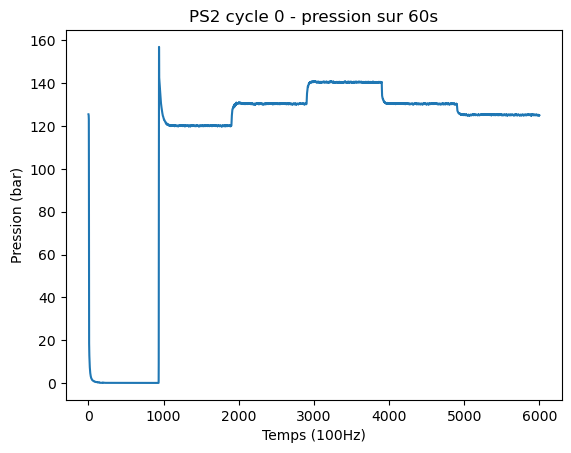

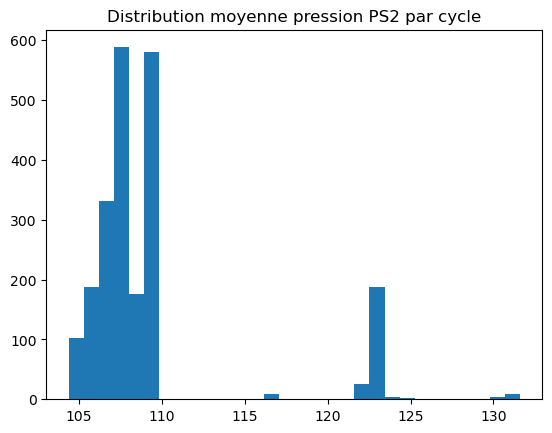

In [ ]:
#6 Visualize PS2 Data

# View a few cycles (example of first cycle)plt.plot(ps2.iloc[0])
plt.title("PS2 cycle 0 - pression sur 60s")
plt.xlabel("Temps (100Hz)")
plt.ylabel("Pression (bar)")
plt.show()

# Calculate average per cycle
ps2_mean = ps2.mean(axis=1)
plt.hist(ps2_mean, bins=30)
plt.title("Distribution moyenne pression PS2 par cycle")
plt.show()

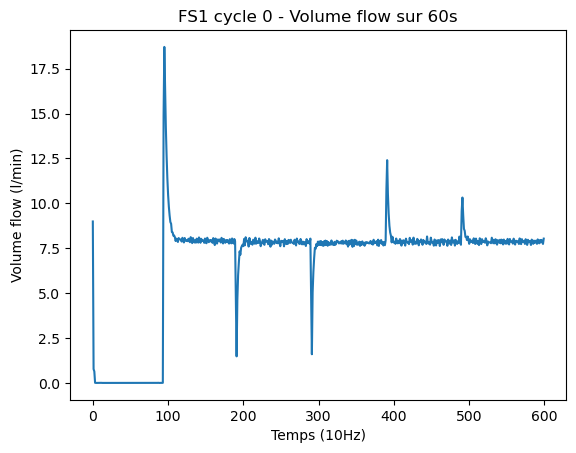

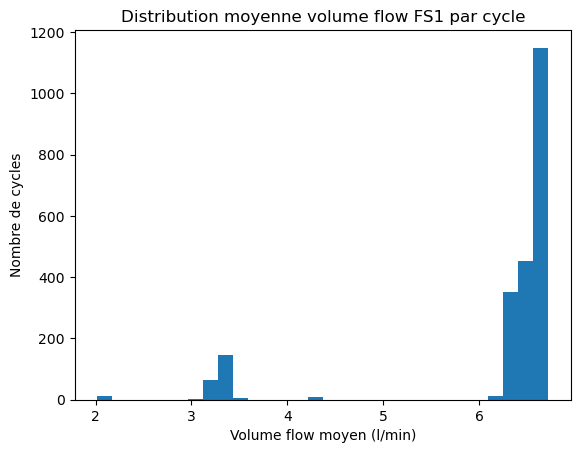

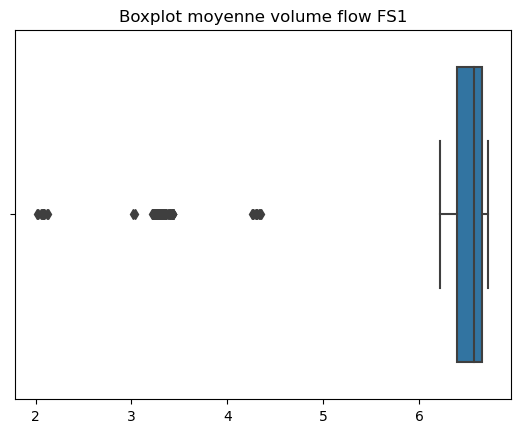

In [ ]:
# 6.  Visualize FS1 Data

# View a few cycles (example of first cycle)
plt.plot(fs1.iloc[0])
plt.title("FS1 cycle 0 - Volume flow sur 60s")
plt.xlabel("Temps (10Hz)")
plt.ylabel("Volume flow (l/min)")
plt.show()

# Calculate the average volume flow per cycle
fs1_mean = fs1.mean(axis=1)

# View the distribution of averages by cycle
plt.hist(fs1_mean, bins=30)
plt.title("Distribution moyenne volume flow FS1 par cycle")
plt.xlabel("Volume flow moyen (l/min)")
plt.ylabel("Nombre de cycles")
plt.show()

# Optional: Boxplot to detect outliers
sns.boxplot(x=fs1_mean)
plt.title("Boxplot moyenne volume flow FS1")
plt.show()